In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($filterTypes_0:[SecurityTypeEnum!]!,$limit_1:[SecurityLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenSecurities25Yc4F:screenSecurities(filterTypes:$filterTypes_0,filterCategory:[],limit:$limit_1,first:100) {edges {node {symbol}}}}'
variables = {'filterTypes_0': ['EQUITY'], 'limit_1':[{'type':'MARKET_CAP','min':69000000000,'inclusive':True},{'type':'DIVIDEND_YIELD','min':.96,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
symbols = [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['_screenSecurities25Yc4F']['edges']]

In [ ]:
quote = Quote(symbols, 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

In [ ]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-shrp'] > 0.4)]
stat

In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['PEP'] -1.1435198267848037 0.6 0.4516992690203144 2.395219095805118
['PEP', 'KO'] -1.2375817317751112 0.5378359150760892 0.5642105648514756 2.339628211702676
['PEP', 'MCD'] -1.2490838030589728 0.5567842651245711 0.5257692651261648 2.331637333309709
['PEP', 'UL'] -1.522622401441812 0.14375222849286895 0.4617587038683718 2.128133333803053
['KO', 'UL'] -1.579312443564116 -0.0810399935630377 0.574269999699533 2.0725424497006113


['KO', 'UL']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['KO', 'UL'], sr=0)

['KO', 'UL'] 0.49323000613649526 -0.0810399935630377 0.574269999699533 2.0725424497006113
['KO', 'UL', 'PEP'] 0.333595806141767 0.20018271666864015 0.5334130894731268 2.1801013317354467
['KO', 'UL', 'PEP', 'MCD'] -0.02349058421575323 0.2264897833713979 0.5500196324128489 2.20208989150516
['KO', 'UL', 'PEP', 'LMT'] -0.04189572577711592 0.10729345019260735 0.6508108240302768 1.9871088098699923
['KO', 'UL', 'PEP', 'WMT'] -0.08379668516838379 0.1489831718783734 0.5672201429532429 1.8818525227552731
['KO', 'UL', 'PEP', 'NEE'] -0.08538552723770432 0.13199073028973332 0.5826237424725624 1.842305709897011
['KO', 'UL', 'MCD', 'WMT'] -0.1257129662611054 0.07003189273272659 0.6042551410061681 1.8500616415075686
['KO', 'UL', 'MCD', 'NEE'] -0.1819609081420423 -0.0016196486675300232 0.6196587405254878 1.8105148286493065


['KO', 'UL', 'MCD', 'NEE']

In [6]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 6, ['KO', 'UL', 'MCD', 'NEE'], sr=0)

['KO', 'UL', 'MCD', 'NEE'] -0.1819609081420423 -0.0016196486675300232 0.6196587405254878 1.8105148286493065
['KO', 'UL', 'MCD', 'NEE', 'PEP'] -0.5137606355347739 0.10017251824077315 0.5860668462244532 1.9274556820804687
['KO', 'UL', 'MCD', 'NEE', 'PEP', 'MDLZ'] -0.814542832205104 0.17396190849279972 0.6114952593020964 1.9595465316831924
['KO', 'UL', 'MCD', 'NEE', 'PEP', 'LMT'] -0.862968090362635 0.08147553316669978 0.6555563764706653 1.840901609112662
['KO', 'UL', 'MCD', 'NEE', 'PEP', 'UN'] -0.8974127877880196 0.1276110691287067 0.5749761430832738 1.8393620331574905
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT'] -0.9450579390759578 0.04380891211188913 0.6111331488121532 1.6046765331590962


['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT']

In [7]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 8, ['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT'], sr=0)

['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT'] -0.9450579390759578 0.04380891211188913 0.6111331488121532 1.6046765331590962
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP'] -1.313930599746814 0.09771251998272397 0.5883568802704618 1.7176111849656708
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'MDLZ'] -1.6393829512750189 0.1534751129020382 0.6071419358229433 1.7679098843070635
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'LMT'] -1.6856893679445877 0.07412285835604256 0.6401877736993701 1.6789261923791656
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO'] -1.7033501840094023 0.1259916831824111 0.5706581328081869 1.666809173788999


['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO']

In [8]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 10, ['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO'], sr=0)

['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO'] -1.7033501840094023 0.1259916831824111 0.5706581328081869 1.666809173788999
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'MDLZ'] -2.0420807760429933 0.1685967364952504 0.5893224874617565 1.717163796667645
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'MDLZ', 'SBUX'] -2.3897480375638045 0.18785805588767243 0.6223939065485234 1.695729627651028
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'MDLZ', 'LMT'] -2.439750923000345 0.12955843551390167 0.6306906414857535 1.6862605414282434
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'LMT', 'COST'] -2.452655866235421 0.1076941050900817 0.6396500286744974 1.5705190226403696
['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'LMT', 'T'] -2.453233645188439 0.06900916592262453 0.6777571888889364 1.5328354129710213


['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'LMT', 'T']

In [12]:
quote.setup_mask(['MCD', 'NEE', 'UN', 'WMT', 'DEO', 'LMT', 'T'])
quote.find_optimal_ratio(21, 3, .91)

({'MCD': 0.24,
  'NEE': 0.14,
  'UN': 0.18,
  'WMT': 0.03,
  'DEO': 0.08,
  'LMT': 0.12,
  'T': 0.12},
 3.0525,
 0.6593)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,63.0,3.374536,0.738507,1.574483,2.991852,3.385383,3.895882,5.394435,4.343723,1.197153
PEP,63.0,4.062081,1.626329,0.437330,3.062177,4.295081,4.950648,7.553566,2.395219,2.258496
KO,63.0,3.965498,1.663209,0.387284,2.895658,3.897456,4.846322,8.396620,2.284037,3.383609
MCD,63.0,3.611549,1.518870,-0.558029,2.900719,3.859939,4.619850,6.412885,2.268056,2.999196
UL,63.0,3.995982,2.057613,0.453887,2.455118,3.879777,5.448874,9.185805,1.861048,2.359091
LMT,63.0,5.925628,4.089790,-2.776692,3.142806,5.738054,9.078788,14.118079,1.408131,5.015020
UN,63.0,3.070885,2.076082,-0.393697,1.641964,2.732602,4.073967,8.559660,1.398894,2.597613
DEO,63.0,2.155652,1.516926,-0.756932,1.343511,2.073565,3.139813,5.159466,1.311195,2.233835
WMT,63.0,3.468633,3.345098,-1.971514,0.681510,3.314974,5.688452,9.208715,0.987106,3.343207
NEE,63.0,2.595589,2.930230,-2.317953,0.039516,2.042552,4.616606,9.475382,0.828919,3.651279


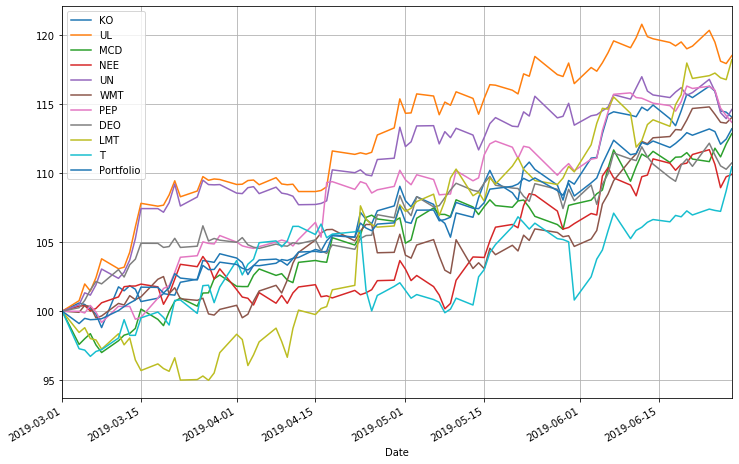

In [13]:
%pylab inline
quote.setup_mask(['KO', 'UL', 'MCD', 'NEE', 'UN', 'WMT', 'PEP', 'DEO', 'LMT', 'T'])
quote.graph(21, {'UL': 0.03, 'KO': 0.03, 'PEP': 0.03, 'MCD': 0.24,
  'NEE': 0.14,
  'UN': 0.18,
  'WMT': 0.03,
  'DEO': 0.08,
  'LMT': 0.12,
  'T': 0.12})